# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | lyantor
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | nikolayevsk-on-amure
Processing Record 5 of Set 1 | tarawa
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bairnsdale
Processing Record 8 of Set 1 | san antonio del estrecho
City not found. Skipping...
Processing Record 9 of Set 1 | cockburn town
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | kailua-kona
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | bulayevo
Processing Record 18 of Set 1 | korla
Processing Record 19 of Set 1 | tamanrasset
Processing Record 20 of Set 1 | chibougamau
Processing Record 21 of Set 1 | bijie
Proce

Processing Record 34 of Set 4 | longyearbyen
Processing Record 35 of Set 4 | mezhdurechenskiy
Processing Record 36 of Set 4 | dhuusamarreeb
Processing Record 37 of Set 4 | qarqaraly
Processing Record 38 of Set 4 | saipan
Processing Record 39 of Set 4 | walvis bay
Processing Record 40 of Set 4 | suntar
Processing Record 41 of Set 4 | grantsville
Processing Record 42 of Set 4 | sandnessjoen
Processing Record 43 of Set 4 | daru
Processing Record 44 of Set 4 | isle of lewis
City not found. Skipping...
Processing Record 45 of Set 4 | afaahiti
Processing Record 46 of Set 4 | badger
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | nukunonu
City not found. Skipping...
Processing Record 49 of Set 4 | verkhnevilyuysk
Processing Record 0 of Set 5 | tafuna
Processing Record 1 of Set 5 | moroto
Processing Record 2 of Set 5 | ulladulla
Processing Record 3 of Set 5 | kingston
Processing Record 4 of Set 5 | zhuanghe
Processing Record 5 of Set 5 | seguin
Processing Record 6 o

Processing Record 24 of Set 8 | svetlyy
Processing Record 25 of Set 8 | kirov
Processing Record 26 of Set 8 | greymouth
Processing Record 27 of Set 8 | kosh-agach
Processing Record 28 of Set 8 | faya-largeau
Processing Record 29 of Set 8 | puerto baquerizo moreno
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | tinogasta
Processing Record 32 of Set 8 | centenario
Processing Record 33 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 34 of Set 8 | rundu
Processing Record 35 of Set 8 | eirunepe
Processing Record 36 of Set 8 | georgiyevka
Processing Record 37 of Set 8 | naryn
Processing Record 38 of Set 8 | mahina
Processing Record 39 of Set 8 | souillac
Processing Record 40 of Set 8 | sabzevar
Processing Record 41 of Set 8 | chichimila
Processing Record 42 of Set 8 | holualoa
Processing Record 43 of Set 8 | zelenoborskiy
Processing Record 44 of Set 8 | mili
Processing Record 45 of Set 8 | remire-montjoly
Processing Record 46 of Set 8 | alo
Proc

Processing Record 17 of Set 12 | solnechniy
City not found. Skipping...
Processing Record 18 of Set 12 | beyneu
Processing Record 19 of Set 12 | diebougou
Processing Record 20 of Set 12 | elkins
Processing Record 21 of Set 12 | bayganin
Processing Record 22 of Set 12 | vallenar
Processing Record 23 of Set 12 | zagora
Processing Record 24 of Set 12 | black point
Processing Record 25 of Set 12 | askoy
Processing Record 26 of Set 12 | selfoss
Processing Record 27 of Set 12 | trondheim
Processing Record 28 of Set 12 | neelankarai
Processing Record 29 of Set 12 | pangody
Processing Record 30 of Set 12 | nampula
Processing Record 31 of Set 12 | syktyvkar
Processing Record 32 of Set 12 | fuxin
Processing Record 33 of Set 12 | ramhormoz
Processing Record 34 of Set 12 | vadso
Processing Record 35 of Set 12 | pocoes
Processing Record 36 of Set 12 | alagir
Processing Record 37 of Set 12 | smara
Processing Record 38 of Set 12 | haiku-pauwela
Processing Record 39 of Set 12 | tsiombe
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-22.71,84,20,3.60,CA,1702317591
1,lyantor,61.6195,72.1555,-32.90,95,55,3.33,RU,1702317789
2,grytviken,-54.2811,-36.5092,4.66,82,95,5.34,GS,1702317789
3,nikolayevsk-on-amure,53.1406,140.7300,-21.57,84,53,4.59,RU,1702317791
4,tarawa,1.4190,172.9840,26.05,94,75,0.51,KI,1702317793


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-22.71,84,20,3.60,CA,1702317591
1,lyantor,61.6195,72.1555,-32.90,95,55,3.33,RU,1702317789
2,grytviken,-54.2811,-36.5092,4.66,82,95,5.34,GS,1702317789
3,nikolayevsk-on-amure,53.1406,140.7300,-21.57,84,53,4.59,RU,1702317791
4,tarawa,1.4190,172.9840,26.05,94,75,0.51,KI,1702317793


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

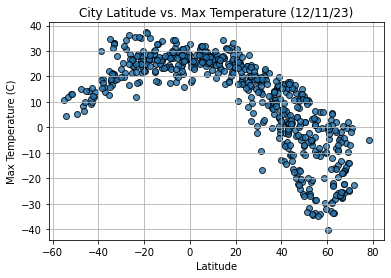

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))  
plt.ylabel("Max Temperature (C)")  
plt.xlabel("Latitude")  
plt.grid(True)  

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

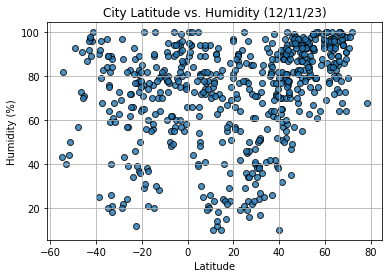

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))  
plt.ylabel("Humidity (%)")  
plt.xlabel("Latitude")  
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

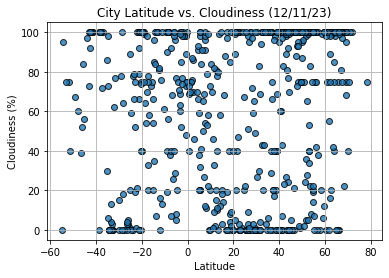

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))  
plt.ylabel("Cloudiness (%)")  
plt.xlabel("Latitude")  
plt.grid(True) 


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

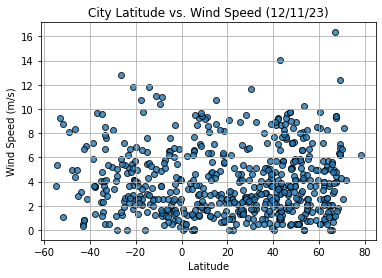

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))  
plt.ylabel("Wind Speed (m/s)")  
plt.xlabel("Latitude")  
plt.grid(True) 


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression (x,y,x_label, y_label,title):
    slope, intercept, r_value, p_value, std_err=linregress(x,y)
    plt.scatter(x, y)
    
    best_fit_line=slope*x+intercept
    plt.plot(x, best_fit_line, color='red')
    line_eq=f'y={slope:.2f}x+{intercept:.2f}'
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.annotate(line_eq,(x.min(),y.min()),fontsize=15,color='red')
    print(f"Correlation coefficient (r_value): {r_value}")
    plt.show()
    return slope, intercept, r_value, p_value, std_err

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-22.71,84,20,3.60,CA,1702317591
1,lyantor,61.6195,72.1555,-32.90,95,55,3.33,RU,1702317789
3,nikolayevsk-on-amure,53.1406,140.7300,-21.57,84,53,4.59,RU,1702317791
4,tarawa,1.4190,172.9840,26.05,94,75,0.51,KI,1702317793
7,cockburn town,21.4612,-71.1419,28.98,70,40,6.17,TC,1702317794


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,4.66,82,95,5.34,GS,1702317789
5,adamstown,-25.0660,-130.1015,21.35,62,1,2.37,PN,1702317793
6,bairnsdale,-37.8333,147.6167,18.92,96,100,1.34,AU,1702317793
8,waitangi,-43.9535,-176.5597,14.34,87,97,3.13,NZ,1702317794
10,port-aux-francais,-49.3500,70.2167,5.19,93,67,8.07,TF,1702317795


###  Temperature vs. Latitude Linear Regression Plot

Correlation coefficient (r_value): -0.8237326140949687


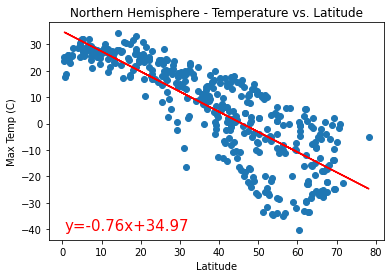

(-0.7625452905363328,
 34.97201696278643,
 -0.8237326140949687,
 2.479304483055551e-103,
 0.02588958179804007)

In [15]:
# Linear regression on Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Max Temp']
plot_linear_regression(x,y,'Latitude','Max Temp (C)', 'Northern Hemisphere - Temperature vs. Latitude')

Correlation coefficient (r_value): 0.6013992067508259


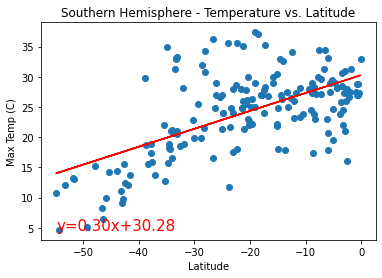

(0.296627663285151,
 30.278232517778097,
 0.6013992067508259,
 2.148073897633912e-18,
 0.030134891233481426)

In [16]:
# Linear regression on Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Max Temp']
plot_linear_regression(x,y,'Latitude','Max Temp (C)', 'Southern Hemisphere - Temperature vs. Latitude')

**Discussion about the linear relationship:** 

Northern Hemisphere: The negative slope of approximately -0.78 indicates a strong inverse relationship between latitude and temperature. As the latitude increases (moving northward away from the equator), the temperature tends to decrease. 

Southern Hemisphere: The positive slope of approximately 0.21 suggests a moderate direct relationship between latitude and temperature. As the latitude increases (which in this case means moving northward towards the equator from the Southern Hemisphere's higher negative latitudes), the temperature tends to increase. 

### Humidity vs. Latitude Linear Regression Plot

Correlation coefficient (r_value): 0.4267191775755408


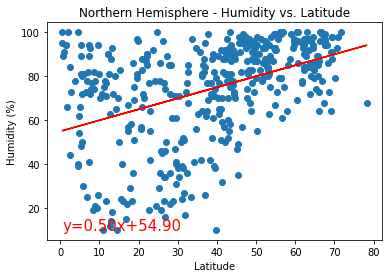

(0.5009538393770203,
 54.89728062117737,
 0.4267191775755408,
 1.0497258035190342e-19,
 0.05237060530953768)

In [17]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Humidity']
plot_linear_regression(x,y,'Latitude','Humidity (%)', 'Northern Hemisphere - Humidity vs. Latitude')


Correlation coefficient (r_value): 0.08098251202463426


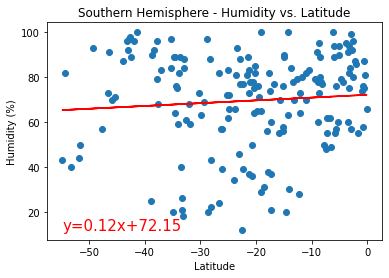

(0.12409368392873582,
 72.15201934405714,
 0.08098251202463426,
 0.289518983828826,
 0.11679697638455178)

In [18]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Humidity']
plot_linear_regression(x,y,'Latitude','Humidity (%)', 'Southern Hemisphere - Humidity vs. Latitude')

**Discussion about the linear relationship:** 

In both hemispheres, despite the spread of data, there is a general trend of increasing humidity with increasing latitude. However, the plots do not show a significant difference between the hemispheres regarding the rate of change in humidity with latitude, given that the slopes are the same. 

### Cloudiness vs. Latitude Linear Regression Plot

Correlation coefficient (r_value): 0.26047347430839984


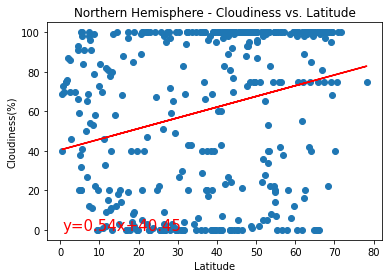

(0.541999277578872,
 40.44944412342017,
 0.26047347430839984,
 7.856955405456853e-08,
 0.09909643414727609)

In [19]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Cloudiness']
plot_linear_regression(x,y,'Latitude','Cloudiness(%)', 'Northern Hemisphere - Cloudiness vs. Latitude')

Correlation coefficient (r_value): 0.1807386820130813


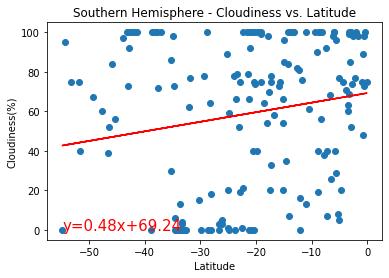

(0.484498399940953,
 69.23758190438183,
 0.1807386820130813,
 0.017329378968356998,
 0.20161892811058924)

In [20]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Cloudiness']
plot_linear_regression(x,y,'Latitude','Cloudiness(%)', 'Southern Hemisphere - Cloudiness vs. Latitude')

**Discussion about the linear relationship:** 

In both hemispheres, the positive slopes indicate that cloudiness tends to increase with latitude. However, the strength of this relationship appears to be stronger in the Southern Hemisphere based on the given data. However, the spread of the data points suggests other factors may influence cloudiness beyond just latitude. 


### Wind Speed vs. Latitude Linear Regression Plot

Correlation coefficient (r_value): 0.10649783791658497


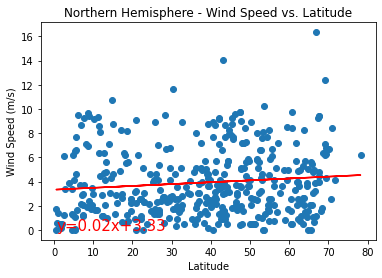

(0.015406932599576779,
 3.329311984395464,
 0.10649783791658497,
 0.030472837454023703,
 0.0070954112049344265)

In [21]:
# Northern Hemisphere
x=northern_hemi_df['Lat']
y=northern_hemi_df['Wind Speed']
plot_linear_regression(x,y,'Latitude','Wind Speed (m/s)', 'Northern Hemisphere - Wind Speed vs. Latitude')

Correlation coefficient (r_value): -0.11950149507772694


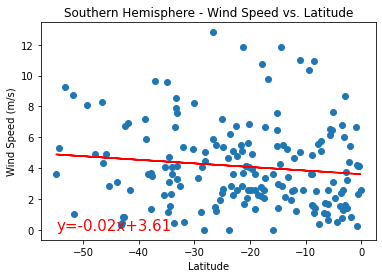

(-0.02332485751951641,
 3.6123755928301424,
 -0.11950149507772694,
 0.11734416627732647,
 0.014819182824607216)

In [22]:
# Southern Hemisphere
x=southern_hemi_df['Lat']
y=southern_hemi_df['Wind Speed']
plot_linear_regression(x,y,'Latitude','Wind Speed (m/s)', 'Southern Hemisphere - Wind Speed vs. Latitude')

**Discussion about the linear relationship:** 

In both hemispheres, the regression lines indicate that latitude alone does not strongly determine wind speed. Other factors are likely more influential on wind speed patterns. The data does not show a significant contrast in the relationship between wind speed and latitude when comparing the Northern to the Southern Hemisphere.